Total amount of images: 354
Dataset contains 708 image pairs
Train contains 566 image pairs
Validation contains 70 image pairs
Test contains 72 image pairs


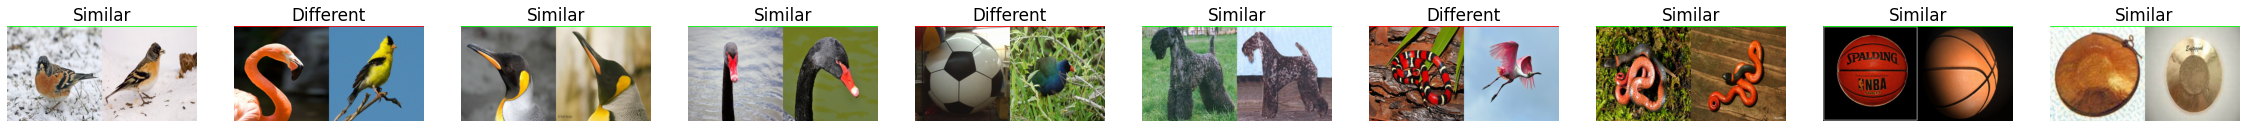

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [2]:
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

input_shape = (224, 224, 3)

mobilenet_embedding = Sequential(name='mobilenet_embedding')
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet.Trainable = False
mobilenet_embedding.add(mobilenet)
mobilenet_embedding.add(GlobalAveragePooling2D())

In [3]:
similarity = util.get_similarity_from_embedding(mobilenet_embedding, data)

Took 57.95 seconds to predict 708 image pairs
Prediction time: 0.08 seconds


Best accuracy: 0.9872881355932204
mobilenet
- Amount of TP: 351
- Amount of TN: 348
- Amount of FP: 6
- Amount of FN: 3
- AUC score: 0.9968160490280571
- Accuracy: 0.9872881355932204
- Recall: 0.9915254237288136
- Precision: 0.9831932773109243
- F1: 0.9873417721518987
- Kappa: 0.9745762711864406


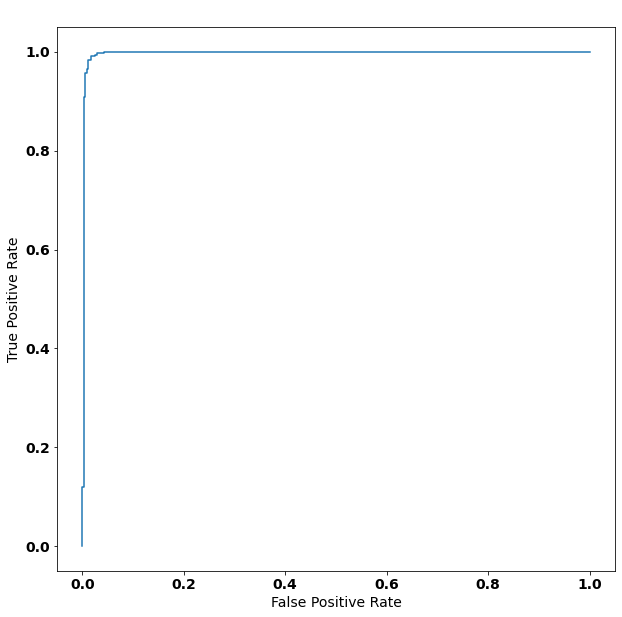

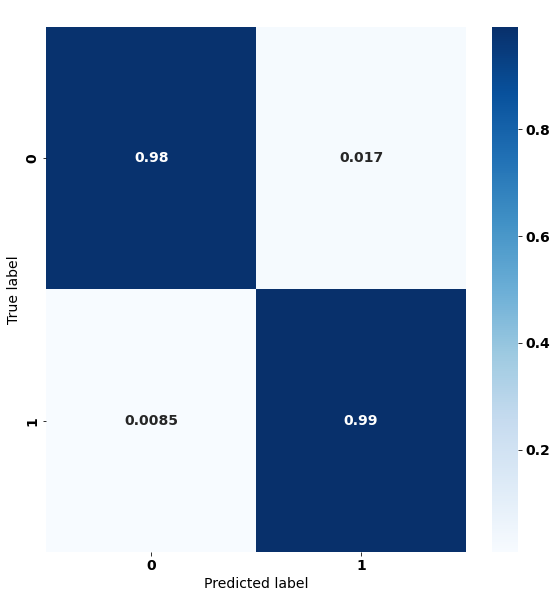

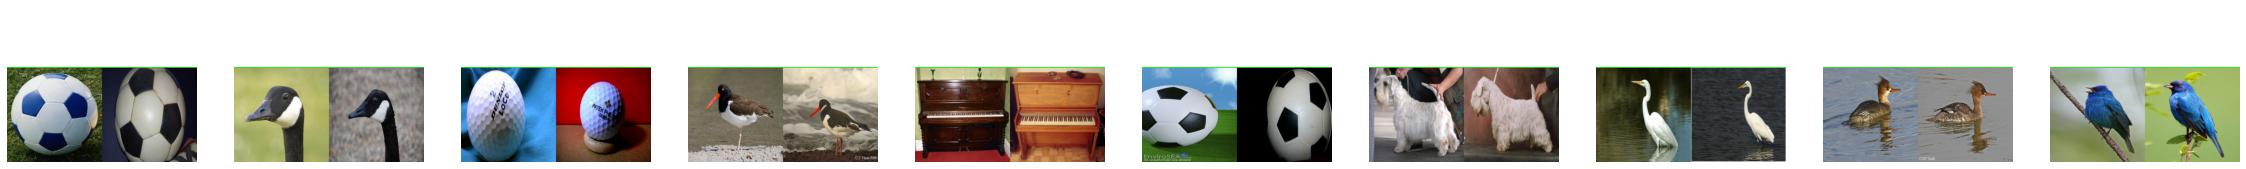

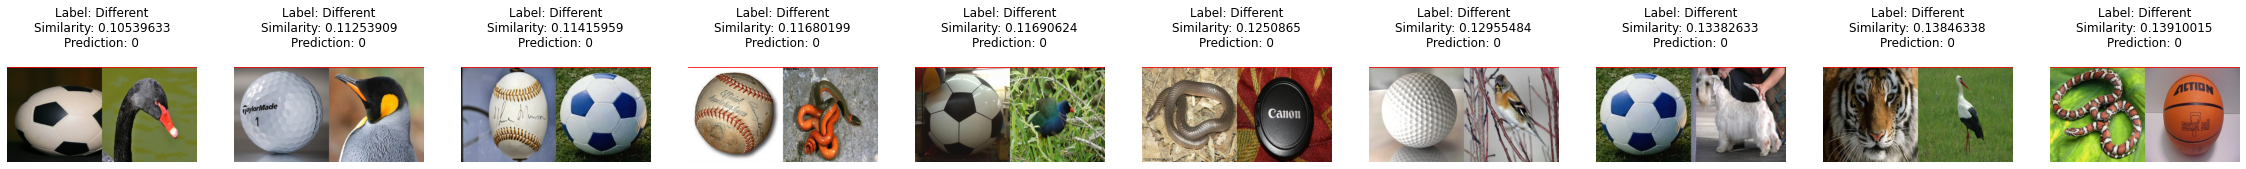

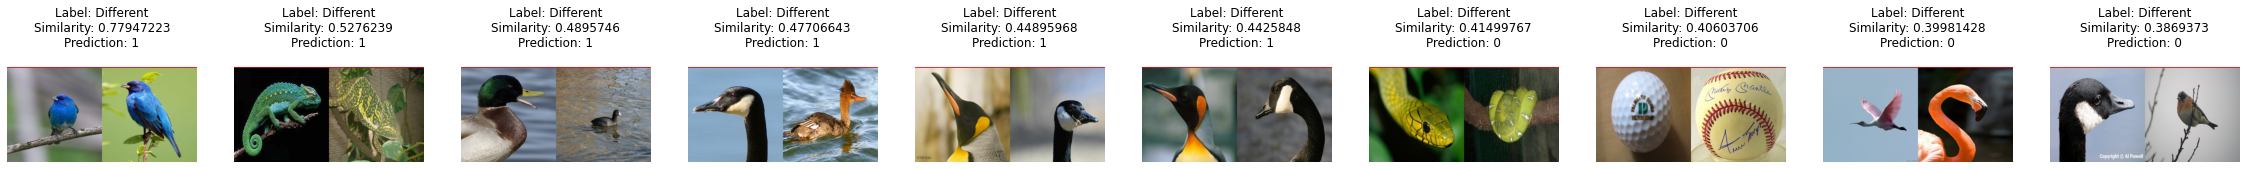

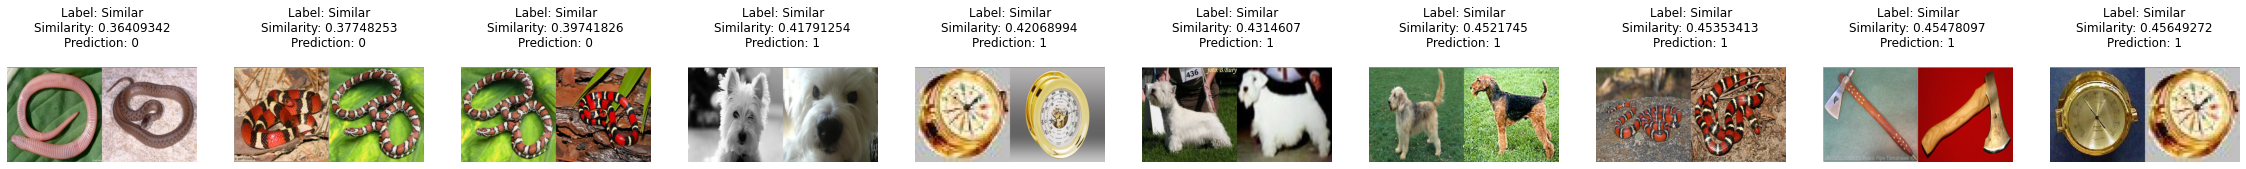

Threshold:  0.41500000000000026


In [4]:
util.evaluate(data=data, labels=labels, similarity=similarity, name="mobilenet")

In [5]:
mobilenet_embedding.save('./pretrained_mobilenet_embedding_extractor.h5')

In [6]:
!tensorflowjs_converter --input_format keras --weight_shard_size_bytes 1073741824 ./pretrained_mobilenet_embedding_extractor.h5 .